In [30]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

PATH_TED = "../data_raw/export_CFC_2018_2023.csv"
PATH_PCSP = "../data_raw/e05188501-perfiles-de-contratante-de-los-organos-de-contratacion-alojados-en-la-plataforma-de-contratacion-del-sector-publico.csv"


In [31]:


pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

PATH_TED = "../data_raw/export_CFC_2018_2023.csv"
PATH_PCSP = "../data_raw/e05188501-perfiles-de-contratante-de-los-organos-de-contratacion-alojados-en-la-plataforma-de-contratacion-del-sector-publico.csv"


In [32]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

PATH_TED = "../data_raw/export_CFC_2018_2023.csv"
PATH_PCSP = "../data_raw/e05188501-perfiles-de-contratante-de-los-organos-de-contratacion-alojados-en-la-plataforma-de-contratacion-del-sector-publico.csv"


In [33]:
from pathlib import Path
import pandas as pd

# El notebook está en /notebooks
PATH_TED = Path("../data/raw/ted_es_clean.csv")
PATH_PCSP = Path("../data/raw/contratos_2020_detalle.csv")

# Comprobación (MUY IMPORTANTE)
PATH_TED.exists(), PATH_PCSP.exists()


(True, True)

In [34]:
ted_head = pd.read_csv(PATH_TED, nrows=5, low_memory=False)
pcsp_head = pd.read_csv(PATH_PCSP, nrows=5, low_memory=False)

print("TED columns:", list(ted_head.columns))
print("PCSP columns:", list(pcsp_head.columns))

ted_head, pcsp_head


TED columns: ['DT_DISPATCH', 'ISO_COUNTRY_CODE', 'TYPE_OF_CONTRACT', 'CPV', 'LOTS_NUMBER', 'VALUE_EURO', 'CRIT_CODE', 'CPV_GROUP', 'YEAR']
PCSP columns: ['contract_folder_id', 'date_2020', 'cpv_main', 'cpv_all', 'source_file']


(  DT_DISPATCH ISO_COUNTRY_CODE TYPE_OF_CONTRACT         CPV  LOTS_NUMBER   VALUE_EURO CRIT_CODE  CPV_GROUP  YEAR
 0  2021-12-29               ES                W  45215140.0          1.0  14331693.71       NaN         45  2021
 1  2022-12-28               ES                S  72200000.0          1.0    595041.32       NaN         72  2022
 2  2017-12-29               ES                W  45112100.0          4.0   3288261.39         L         45  2017
 3  2017-12-29               ES                W  45112100.0          4.0   3288261.39         L         45  2017
 4  2017-12-29               ES                W  45112100.0          4.0   3288261.39         L         45  2017,
                            contract_folder_id   date_2020  cpv_main            cpv_all                                        source_file
 0                         (221.19) 19.235976W  2020-03-20  71610000           71610000  licitacionesPerfilesContratanteCompleto3_20200...
 1  (A02002842)-Expte nº 2020 CONMY 1

In [35]:
ted_head = pd.read_csv(PATH_TED, nrows=5, low_memory=False)
pcsp_head = pd.read_csv(PATH_PCSP, nrows=5, low_memory=False)

print("TED shape (head):", ted_head.shape)
print("PCSP shape (head):", pcsp_head.shape)

ted_head.head()


TED shape (head): (5, 9)
PCSP shape (head): (5, 5)


,DT_DISPATCH,ISO_COUNTRY_CODE,TYPE_OF_CONTRACT,CPV,LOTS_NUMBER,VALUE_EURO,CRIT_CODE,CPV_GROUP,YEAR
0,2021-12-29,ES,W,45215140.0,1.0,14331693.71,NaN,45,2021
1,2022-12-28,ES,S,72200000.0,1.0,595041.32,NaN,72,2022
2,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45,2017
3,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45,2017
4,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45,2017


In [36]:
pcsp_head.head()


,contract_folder_id,date_2020,cpv_main,cpv_all,source_file
0,(221.19) 19.235976W,2020-03-20,71610000,71610000,licitacionesPerfilesContratanteCompleto3_20200...
1,(A02002842)-Expte nº 2020 CONMY 1800000454,2020-09-28,80590000,80590000,licitacionesPerfilesContratanteCompleto3_20200...
2,(A02002842)-FP 2/2020,2020-09-01,42612200,42612200;42620000,licitacionesPerfilesContratanteCompleto3_20200...
3,(A02002842)-FP 5/2020,2020-12-29,66516000,66516000;66512100,licitacionesPerfilesContratanteCompleto3_20201...
4,(A02002842)-SDAMB 1332/2020/75,2020-10-19,31518600,31518600,licitacionesPerfilesContratanteCompleto3_20200...


In [37]:
print("TED columns:\n", ted_head.columns.tolist())
print("\nPCSP columns:\n", pcsp_head.columns.tolist())


TED columns:
 ['DT_DISPATCH', 'ISO_COUNTRY_CODE', 'TYPE_OF_CONTRACT', 'CPV', 'LOTS_NUMBER', 'VALUE_EURO', 'CRIT_CODE', 'CPV_GROUP', 'YEAR']

PCSP columns:
 ['contract_folder_id', 'date_2020', 'cpv_main', 'cpv_all', 'source_file']


In [38]:
chunks = pd.read_csv(
    PATH_TED,
    usecols=[
        "ISO_COUNTRY_CODE",
        "CPV",
        "TYPE_OF_CONTRACT",
        "VALUE_EURO",
        "DT_DISPATCH",
        "CRIT_CODE",
        "LOTS_NUMBER"
    ],
    chunksize=300_000,
    low_memory=False
)

ted_es = []

for ch in chunks:
    es = ch[ch["ISO_COUNTRY_CODE"] == "ES"]
    if len(es):
        ted_es.append(es)

ted_es = pd.concat(ted_es, ignore_index=True)
ted_es.shape


(323375, 7)

In [39]:
# Importes
ted_es["VALUE_EURO"].describe(percentiles=[.5, .9, .99])

# CPV (primeros 2 dígitos)
ted_es["CPV_GROUP"] = ted_es["CPV"].astype(str).str[:2]
ted_es["CPV_GROUP"].value_counts().head(10)

# Tipo de contrato
ted_es["TYPE_OF_CONTRACT"].value_counts()


TYPE_OF_CONTRACT
S    161189
U    155963
W      6223
Name: count, dtype: int64

In [40]:
import os
os.makedirs("../data", exist_ok=True)


In [41]:
ted_es_sample = ted_es.sample(10_000, random_state=42)
ted_es_sample.to_csv("../data/sample_ted_es.csv", index=False)


In [42]:
print(ted_es.shape)
ted_es.head()


(323375, 8)


,DT_DISPATCH,ISO_COUNTRY_CODE,TYPE_OF_CONTRACT,CPV,LOTS_NUMBER,VALUE_EURO,CRIT_CODE,CPV_GROUP
0,2021-12-29,ES,W,45215140.0,1.0,14331693.71,NaN,45
1,2022-12-28,ES,S,72200000.0,1.0,595041.32,NaN,72
2,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45
3,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45
4,2017-12-29,ES,W,45112100.0,4.0,3288261.39,L,45


In [43]:
ted_es.columns


Index(['DT_DISPATCH', 'ISO_COUNTRY_CODE', 'TYPE_OF_CONTRACT', 'CPV', 'LOTS_NUMBER', 'VALUE_EURO', 'CRIT_CODE', 'CPV_GROUP'], dtype='object')

In [44]:
# quitar filas sin importe
ted_es = ted_es.dropna(subset=["VALUE_EURO"])

# convertir fecha
ted_es["DT_DISPATCH"] = pd.to_datetime(ted_es["DT_DISPATCH"], errors="coerce")

# crear año
ted_es["YEAR"] = ted_es["DT_DISPATCH"].dt.year

ted_es.shape


(323375, 9)

In [45]:
ted_es["YEAR"].value_counts().sort_index()



YEAR
2017       67
2018    29604
2019    52484
2020    71319
2021    62386
2022    61005
2023    46510
Name: count, dtype: int64

In [46]:
ted_es["VALUE_EURO"].describe(percentiles=[0.5, 0.9, 0.99])


count    3.233750e+05
mean     2.413638e+07
std      7.236132e+08
min      1.000000e-02
50%      1.386840e+06
90%      4.892391e+07
99%      2.038252e+08
max      4.083333e+11
Name: VALUE_EURO, dtype: float64

In [47]:
ted_es["CPV_GROUP"].value_counts().head(10)


CPV_GROUP
33    57270
85    27030
50    21562
90    20109
60    19639
71    15165
15    13166
34    13031
72    12451
79    11913
Name: count, dtype: int64

In [48]:
ted_es["TYPE_OF_CONTRACT"].value_counts()


TYPE_OF_CONTRACT
S    161189
U    155963
W      6223
Name: count, dtype: int64

In [49]:
ted_es.to_csv("../data/ted_es_clean.csv", index=False)


EDA – Public Procurement in Spain (TED)
Overview

This exploratory data analysis (EDA) analyses public procurement contract notices in Spain published in Tenders Electronic Daily (TED) for the period 2018–2023.
The objective is to understand the volume, value and structure of public procurement as a first step towards machine learning models and analytical dashboards.

Data Source

Tenders Electronic Daily (TED) – European Commission

Period: 2018–2023

Country: Spain (ISO code: ES)

Dataset Preparation

Original dataset size: ~4 GB (raw TED data)

Data processed locally using chunk-based reading

Filtered to Spanish contracts only

Basic cleaning applied:

Removal of missing contract values

Date parsing and year extraction

CPV grouping at 2-digit level

Final working dataset:

323,375 contracts

9 analytical variables

Key Variables

DT_DISPATCH – publication date

YEAR – publication year

TYPE_OF_CONTRACT – services, supplies, works

CPV / CPV_GROUP – contract subject

VALUE_EURO – contract value

LOTS_NUMBER – number of lots

CRIT_CODE – award criterion

Key Findings
Contract Volume by Year

Stable and consistent coverage between 2018 and 2023

2017 records are residual and linked to data transitions

Contract Value Distribution

Median value: ~1.39 million EUR

Highly right-skewed distribution

Presence of very large contracts (expected in public procurement)

Type of Contract

Services (S): ~161,000 contracts

Supplies (U): ~156,000 contracts

Works (W): ~6,000 contracts

Public procurement in Spain is dominated by services and supplies, while works are less frequent but typically higher in value.

CPV Analysis (Top Groups)

The most frequent CPV groups correspond to:

Healthcare-related procurement

Professional and technical services

ICT and digital services

Transport and infrastructure-related services

These patterns are fully consistent with the structure of Spanish public procurement.

Output

A cleaned and reproducible analytical dataset has been generated and stored as:

data/ted_es_clean.csv


This dataset is ready for:

Feature engineering

Machine learning models

Integration into BI dashboards (e.g. Power BI)

Next Steps

Definition of machine learning objectives

Integration with national Spanish data (PCSP)

Development of procurement indicators and dashboards

In [ ]:
from xml.etree import ElementTree as ET

ATOM_PATH = "../data_raw/pcsp/2020/licitacionesPerfilesContratanteCompleto3_20200712_150726_1.atom"

tree = ET.parse(ATOM_PATH)
root = tree.getroot()

root.tag, len(root)


('{http://www.w3.org/2005/Atom}feed', 508)

In [ ]:
import os

os.listdir("../data_raw/pcsp/2020")


['licitacionesPerfilesContratanteCompleto3_20200724_185726_7.atom',
 'licitacionesPerfilesContratanteCompleto3_20200715_212659_7.atom',
 'licitacionesPerfilesContratanteCompleto3_20201029_181628_2.atom',
 'licitacionesPerfilesContratanteCompleto3_20201111_003732_1.atom',
 'licitacionesPerfilesContratanteCompleto3_20201123_151929.atom',
 'licitacionesPerfilesContratanteCompleto3_20200724_002734_4.atom',
 'licitacionesPerfilesContratanteCompleto3_20201216_193011_1.atom',
 'licitacionesPerfilesContratanteCompleto3_20201004_162721_1.atom',
 'licitacionesPerfilesContratanteCompleto3_20200725_111919_4.atom',
 'licitacionesPerfilesContratanteCompleto3_20201008_183751.atom',
 'licitacionesPerfilesContratanteCompleto3_20200819_181328_1.atom',
 'licitacionesPerfilesContratanteCompleto3_20200716_181101_4.atom',
 'licitacionesPerfilesContratanteCompleto3_20200719_154945_3.atom',
 'licitacionesPerfilesContratanteCompleto3_20200721_183210.atom',
 'licitacionesPerfilesContratanteCompleto3_20200724_16

In [ ]:
import os
os.getcwd()


'/Users/mariamiura/procurement-project/notebooks'

In [ ]:
import os
os.listdir("..")


['.venv', 'data_raw', 'data', 'notebooks', 'src']

In [ ]:
import os
os.listdir("../data_raw")


['pcsp',
 'e05188501-perfiles-de-contratante-de-los-organos-de-contratacion-alojados-en-la-plataforma-de-contratacion-del-sector-publico.csv',
 'export_CFC_2018_2023.csv']

In [ ]:
import os

os.listdir("../data_raw/pcsp/2020")[:5]


['licitacionesPerfilesContratanteCompleto3_20200724_185726_7.atom',
 'licitacionesPerfilesContratanteCompleto3_20200715_212659_7.atom',
 'licitacionesPerfilesContratanteCompleto3_20201029_181628_2.atom',
 'licitacionesPerfilesContratanteCompleto3_20201111_003732_1.atom',
 'licitacionesPerfilesContratanteCompleto3_20201123_151929.atom']

In [ ]:
from xml.etree import ElementTree as ET

ATOM_PATH = "../data_raw/pcsp/2020/licitacionesPerfilesContratanteCompleto3_20200724_185726_7.atom"

tree = ET.parse(ATOM_PATH)
root = tree.getroot()

ns = {"atom": "http://www.w3.org/2005/Atom"}

entry = root.find("atom:entry", ns)
title = entry.find("atom:title", ns)

print(title.text)


Obras para la sustitución de la red de tuberías generales de agua sanitaria y red de Bie`s en el Edificio "A" del Rectorado de la Universidad Politécnica de Madrid.


In [ ]:
# fecha de publicación
published = entry.find("atom:published", ns)
published.text if published is not None else None


In [ ]:
# buscar CPV dentro del contenido
content = entry.find("atom:content", ns)

cpvs = []
if content is not None:
    for el in content.iter():
        if el.tag.lower().endswith("cpv"):
            cpvs.append(el.text)

cpvs[:5]


[]

In [ ]:
published = entry.find("atom:published", ns)
print("published:", published.text if published is not None else None)


published: None


In [ ]:
content = entry.find("atom:content", ns)

if content is None:
    print("❌ No existe atom:content en este entry")
    print("Tags hijos disponibles:")
    for el in list(entry)[:20]:
        print(el.tag)
else:
    for el in list(content.iter())[:20]:
        print(el.tag)



❌ No existe atom:content en este entry
Tags hijos disponibles:
{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}summary
{http://www.w3.org/2005/Atom}title
{http://www.w3.org/2005/Atom}updated
{urn:dgpe:names:draft:codice-place-ext:schema:xsd:CommonAggregateComponents-2}ContractFolderStatus


In [ ]:
for el in entry:
    print(el.tag)


{http://www.w3.org/2005/Atom}id
{http://www.w3.org/2005/Atom}link
{http://www.w3.org/2005/Atom}summary
{http://www.w3.org/2005/Atom}title
{http://www.w3.org/2005/Atom}updated
{urn:dgpe:names:draft:codice-place-ext:schema:xsd:CommonAggregateComponents-2}ContractFolderStatus


In [ ]:
updated = entry.find("atom:updated", ns)
print("updated:", updated.text if updated is not None else None)


updated: 2020-06-02T18:16:14.472+02:00


In [ ]:
cfs = entry.find("{urn:dgpe:names:draft:codice-place-ext:schema:xsd:CommonAggregateComponents-2}ContractFolderStatus")

cpvs = []
for el in cfs.iter():
    tag = el.tag.lower()
    if "cpv" in tag and el.text:
        cpvs.append(el.text.strip())

print("CPVs found (first 10):", cpvs[:10])


CPVs found (first 10): []


In [ ]:
cfs = entry.find("{urn:dgpe:names:draft:codice-place-ext:schema:xsd:CommonAggregateComponents-2}ContractFolderStatus")

# imprime tags "candidatas" (clasificación / item / commodity / classification)
candidates = []
for el in cfs.iter():
    t = el.tag
    tl = t.lower()
    if any(k in tl for k in ["class", "commodity", "item", "code", "cpv", "main", "additional"]):
        candidates.append(t)

# muestra únicas y las primeras 60
uniq = list(dict.fromkeys(candidates))
print("\n".join(uniq[:60]))


{urn:dgpe:names:draft:codice-place-ext:schema:xsd:CommonBasicComponents-2}ContractFolderStatusCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}ContractingPartyTypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}IdentificationCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}TypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}SubTypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2}RequiredCommodityClassification
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}ItemClassificationCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}CountrySubentityCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}GuaranteeTypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}EvaluationCriteriaTypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}RequirementTypeCode
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasic

In [ ]:
# namespace de CODICE (donde está ItemClassificationCode)
NS_CODICE_CBC = "urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2"
NS_CODICE_CAC = "urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2"

cpvs = []

for req in cfs.iter(f"{{{NS_CODICE_CAC}}}RequiredCommodityClassification"):
    code_el = req.find(f".//{{{NS_CODICE_CBC}}}ItemClassificationCode")
    if code_el is not None and code_el.text:
        cpvs.append(code_el.text.strip())

print("CPVs:", cpvs)


CPVs: ['45332000']


In [ ]:
import pandas as pd

row = {
    "title": title.text if title is not None else None,
    "updated": updated.text if updated is not None else None,
    "cpv": cpvs[0] if len(cpvs) else None
}

df_one = pd.DataFrame([row])
df_one


,title,updated,cpv
0,Obras para la sustitución de la red de tubería...,2020-06-02T18:16:14.472+02:00,45332000


In [ ]:
def parse_atom_file(path):
    return {
        "title": ...,
        "date": ...,
        "cpv": ...
    }


In [ ]:
import os

PCSP_DIR = "../data_raw/pcsp/2020"
files = sorted([f for f in os.listdir(PCSP_DIR) if f.endswith(".atom")])[:50]
len(files), files[:3]


(50,
 ['licitacionesPerfilesContratanteCompleto3.atom',
  'licitacionesPerfilesContratanteCompleto3_20200712_150726.atom',
  'licitacionesPerfilesContratanteCompleto3_20200712_150726_1.atom'])

In [ ]:
rows = []
for f in files:
    path = os.path.join(PCSP_DIR, f)
    rows.append(parse_atom_file(path))

import pandas as pd
df_pcsp = pd.DataFrame(rows)
df_pcsp.head()


,title,date,cpv
0,Ellipsis,Ellipsis,Ellipsis
1,Ellipsis,Ellipsis,Ellipsis
2,Ellipsis,Ellipsis,Ellipsis
3,Ellipsis,Ellipsis,Ellipsis
4,Ellipsis,Ellipsis,Ellipsis


In [ ]:
from xml.etree import ElementTree as ET

NS_ATOM = {"atom": "http://www.w3.org/2005/Atom"}
NS_CODICE_CBC = "urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2"
NS_CODICE_CAC = "urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2"

def parse_atom_file(path):
    tree = ET.parse(path)
    root = tree.getroot()

    entry = root.find("atom:entry", NS_ATOM)
    if entry is None:
        return {"title": None, "date": None, "cpv": None}

    # title
    title_el = entry.find("atom:title", NS_ATOM)
    title = title_el.text if title_el is not None else None

    # date (updated)
    updated_el = entry.find("atom:updated", NS_ATOM)
    date = updated_el.text if updated_el is not None else None

    # CPV
    cpv = None
    cfs = entry.find(f"{{{NS_CODICE_CAC}}}ContractFolderStatus")
    if cfs is not None:
        for req in cfs.iter(f"{{{NS_CODICE_CAC}}}RequiredCommodityClassification"):
            code_el = req.find(f".//{{{NS_CODICE_CBC}}}ItemClassificationCode")
            if code_el is not None and code_el.text:
                cpv = code_el.text.strip()
                break

    return {
        "title": title,
        "date": date,
        "cpv": cpv
    }


In [ ]:
rows = []
for f in files:
    rows.append(parse_atom_file(os.path.join(PCSP_DIR, f)))

df_pcsp = pd.DataFrame(rows)
df_pcsp.head()


,title,date,cpv
0,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,None
1,Obras de construcción e instalación de un cent...,2020-01-03T13:04:28.942+01:00,None
2,Adquisición de simuladores de I&A para Pizarro...,2020-01-02T14:00:40.564+01:00,None
3,"Servicios asistencia técnica estrategia DUSI ""...",2020-01-02T09:29:29.747+01:00,None
4,Contratación con entidad especializada de los ...,2020-01-10T13:20:42.428+01:00,None


In [ ]:
test_path = os.path.join(PCSP_DIR, files[0])

from xml.etree import ElementTree as ET
tree = ET.parse(test_path)
root = tree.getroot()

ns = {"atom": "http://www.w3.org/2005/Atom"}
entry = root.find("atom:entry", ns)

# encuentra ContractFolderStatus (si existe)
cfs = None
for el in entry:
    if el.tag.endswith("ContractFolderStatus"):
        cfs = el
        break

print("Has ContractFolderStatus:", cfs is not None)

# imprime las primeras 80 etiquetas internas que contengan "Classification" o "Item"
hits = []
if cfs is not None:
    for el in cfs.iter():
        tl = el.tag.lower()
        if "classification" in tl or "item" in tl or "commodity" in tl or "cpv" in tl:
            hits.append(el.tag)

# muestra únicas
uniq = list(dict.fromkeys(hits))
print("\n".join(uniq[:80]))


Has ContractFolderStatus: True
{urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2}RequiredCommodityClassification
{urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2}ItemClassificationCode


In [ ]:
NS_CBC = "urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2"
NS_CAC = "urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2"

# coge el primer ItemClassificationCode que aparezca y muestra texto + atributos
code_el = cfs.find(f".//{{{NS_CBC}}}ItemClassificationCode")
print("text:", code_el.text)
print("attrib:", code_el.attrib)


text: 79992000
attrib: {'listURI': 'http://contrataciondelestado.es/codice/cl/1.04/CPV2007-1.04.gc'}


In [ ]:
from xml.etree import ElementTree as ET

NS_ATOM = {"atom": "http://www.w3.org/2005/Atom"}
NS_CBC = "urn:dgpe:names:draft:codice:schema:xsd:CommonBasicComponents-2"
NS_CAC = "urn:dgpe:names:draft:codice:schema:xsd:CommonAggregateComponents-2"

def parse_atom_file(path):
    tree = ET.parse(path)
    root = tree.getroot()

    entry = root.find("atom:entry", NS_ATOM)
    if entry is None:
        return {"title": None, "date": None, "cpv": None}

    title_el = entry.find("atom:title", NS_ATOM)
    title = title_el.text if title_el is not None else None

    updated_el = entry.find("atom:updated", NS_ATOM)
    date = updated_el.text if updated_el is not None else None

    cpv = None
    cfs = entry.find(f"{{{NS_CAC}}}ContractFolderStatus")
    if cfs is not None:
        code_el = cfs.find(f".//{{{NS_CBC}}}ItemClassificationCode")
        if code_el is not None and code_el.text:
            cpv = code_el.text.strip()

    return {"title": title, "date": date, "cpv": cpv}


In [ ]:
rows = [parse_atom_file(os.path.join(PCSP_DIR, f)) for f in files]
df_pcsp = pd.DataFrame(rows)
df_pcsp.head()


,title,date,cpv
0,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,None
1,Obras de construcción e instalación de un cent...,2020-01-03T13:04:28.942+01:00,None
2,Adquisición de simuladores de I&A para Pizarro...,2020-01-02T14:00:40.564+01:00,None
3,"Servicios asistencia técnica estrategia DUSI ""...",2020-01-02T09:29:29.747+01:00,None
4,Contratación con entidad especializada de los ...,2020-01-10T13:20:42.428+01:00,None


In [ ]:
cpv_values = []

for f in files:
    row = parse_atom_file(os.path.join(PCSP_DIR, f))
    if row["cpv"] is not None:
        cpv_values.append(row["cpv"])

print("CPVs encontrados:", len(cpv_values))
print("Ejemplos:", cpv_values[:5])


CPVs encontrados: 0
Ejemplos: []


In [ ]:
df_pcsp["year"] = df_pcsp["date"].str[:4]
df_pcsp.to_csv("../data/pcsp_2020_sample.csv", index=False)

print("Saved:", df_pcsp.shape)


Saved: (50, 4)


In [ ]:
df_pcsp.to_csv("../data/pcsp_2020_sample.csv", index=False)
print("Guardado")


Guardado


In [ ]:
import os
os.path.exists("../data/pcsp_2020_sample.csv")


True

In [ ]:
import pandas as pd

df = pd.read_csv("../data/pcsp_2020_sample.csv")
df.head()


,title,date,cpv,year
0,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,NaN,2020
1,Obras de construcción e instalación de un cent...,2020-01-03T13:04:28.942+01:00,NaN,2020
2,Adquisición de simuladores de I&A para Pizarro...,2020-01-02T14:00:40.564+01:00,NaN,2020
3,"Servicios asistencia técnica estrategia DUSI ""...",2020-01-02T09:29:29.747+01:00,NaN,2020
4,Contratación con entidad especializada de los ...,2020-01-10T13:20:42.428+01:00,NaN,2020


In [ ]:
df.info

<bound method DataFrame.info of                                                 title                           date  cpv  year
0   Servicio de recepción, apertura y cierre, cont...  2020-12-31T21:24:54.624+01:00  NaN  2020
1   Obras de construcción e instalación de un cent...  2020-01-03T13:04:28.942+01:00  NaN  2020
2   Adquisición de simuladores de I&A para Pizarro...  2020-01-02T14:00:40.564+01:00  NaN  2020
3   Servicios asistencia técnica estrategia DUSI "...  2020-01-02T09:29:29.747+01:00  NaN  2020
4   Contratación con entidad especializada de los ...  2020-01-10T13:20:42.428+01:00  NaN  2020
5   Servicio desplazamiento viajeros entre l'ametl...  2020-01-10T09:43:25.343+01:00  NaN  2020
6   Gestión integral de las instalaciones deportiv...  2020-01-09T13:53:18.708+01:00  NaN  2020
7   Suministro de equip., software, instalación, f...  2020-01-09T09:32:27.177+01:00  NaN  2020
8   FLOSUB.- (T.A. 2020) Contrato de servicios par...  2020-01-08T13:06:33.308+01:00  NaN  2020
9   cont

In [ ]:
df.describe(include="all")


,title,date,cpv,year
count,50,50,0.0,50.0
unique,50,50,NaN,NaN
top,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,NaN,NaN
freq,1,1,NaN,NaN
mean,NaN,NaN,NaN,2020.0
std,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,2020.0
25%,NaN,NaN,NaN,2020.0
50%,NaN,NaN,NaN,2020.0
75%,NaN,NaN,NaN,2020.0


In [ ]:
import pandas as pd

PATH_TED = "../data_raw/export_CFC_2018_2023.csv"

usecols = ["YEAR", "ISO_COUNTRY_CODE", "TYPE_OF_CONTRACT", "CPV", "VALUE_EURO"]

chunks = pd.read_csv(PATH_TED, usecols=usecols, chunksize=300_000, low_memory=False)

parts = []
for ch in chunks:
    ch = ch[(ch["YEAR"] == 2020) & (ch["ISO_COUNTRY_CODE"] == "ES")]
    if len(ch):
        parts.append(ch)

ted_2020_es = pd.concat(parts, ignore_index=True)
print("TED 2020 ES shape:", ted_2020_es.shape)
ted_2020_es.head()


TED 2020 ES shape: (78431, 5)


,YEAR,ISO_COUNTRY_CODE,TYPE_OF_CONTRACT,CPV,VALUE_EURO
0,2020,ES,W,45212312.0,1.453714e+07
1,2020,ES,W,45233000.0,1.038603e+07
2,2020,ES,W,45233000.0,1.275294e+07
3,2020,ES,W,45233000.0,2.076676e+07
4,2020,ES,W,45233120.0,1.156429e+08


In [ ]:
import pandas as pd

pcsp_2020 = pd.read_csv("../data/pcsp_2020_sample.csv")

print("PCSP 2020 sample shape:", pcsp_2020.shape)
pcsp_2020.head()


PCSP 2020 sample shape: (50, 4)


,title,date,cpv,year
0,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,NaN,2020
1,Obras de construcción e instalación de un cent...,2020-01-03T13:04:28.942+01:00,NaN,2020
2,Adquisición de simuladores de I&A para Pizarro...,2020-01-02T14:00:40.564+01:00,NaN,2020
3,"Servicios asistencia técnica estrategia DUSI ""...",2020-01-02T09:29:29.747+01:00,NaN,2020
4,Contratación con entidad especializada de los ...,2020-01-10T13:20:42.428+01:00,NaN,2020


In [ ]:
import os
from xml.etree import ElementTree as ET
import pandas as pd

PCSP_DIR = "../data_raw/pcsp/2020"
SAMPLE_CSV = "../data/pcsp_2020_sample.csv"

# Helper: obtener lista de .atom si existe
def atom_files(dirpath):
    try:
        return sorted([f for f in os.listdir(dirpath) if f.endswith('.atom')])
    except Exception:
        return []

files = atom_files(PCSP_DIR)

if files:
    test_path = os.path.join(PCSP_DIR, files[0])
    print(f"Usando primer .atom disponible: {test_path}")
    try:
        tree = ET.parse(test_path)
        root = tree.getroot()
        ns = {"atom": "http://www.w3.org/2005/Atom"}
        entry = root.find("atom:entry", ns)
        print("Parseo correcto. Entry found:", entry is not None)
    except ET.ParseError as e:
        print("Error al parsear XML:", e)
        with open(test_path, "r", errors="ignore") as f:
            print("Vista previa (primeros 1000 caracteres):\n", f.read(1000))
        raise
else:
    if os.path.exists(SAMPLE_CSV):
        print(f"No se encontraron .atom en {PCSP_DIR}. Cargando CSV de muestra: {SAMPLE_CSV}")
        df_pcsp = pd.read_csv(SAMPLE_CSV)
        print("CSV cargado. Shape:", df_pcsp.shape)
        display(df_pcsp.head())
    else:
        raise FileNotFoundError(
            f"No se encontraron .atom en {PCSP_DIR} y no existe el CSV de muestra {SAMPLE_CSV}.\n"
            "Solución: 1) Copia tus .atom en ../data_raw/pcsp/2020 dentro del contenedor, o 2) coloca un CSV de muestra en ../data/pcsp_2020_sample.csv"
        )


No se encontraron .atom en ../data_raw/pcsp/2020. Cargando CSV de muestra: ../data/pcsp_2020_sample.csv
CSV cargado. Shape: (50, 4)


,title,date,cpv,year
0,"Servicio de recepción, apertura y cierre, cont...",2020-12-31T21:24:54.624+01:00,NaN,2020
1,Obras de construcción e instalación de un cent...,2020-01-03T13:04:28.942+01:00,NaN,2020
2,Adquisición de simuladores de I&A para Pizarro...,2020-01-02T14:00:40.564+01:00,NaN,2020
3,"Servicios asistencia técnica estrategia DUSI ""...",2020-01-02T09:29:29.747+01:00,NaN,2020
4,Contratación con entidad especializada de los ...,2020-01-10T13:20:42.428+01:00,NaN,2020


In [51]:
import pandas as pd
from pathlib import Path

RAW = Path("../data/raw/contratos_2020_detalle.csv")
OUT = Path("../data/processed/pcsp_contracts_2020_clean.csv")
OUT.parent.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(RAW)

def uniq_semicolon(s):
    if pd.isna(s) or not str(s).strip():
        return ""
    items = [x.strip() for x in str(s).split(";") if x.strip()]
    seen = []
    for x in items:
        if x not in seen:
            seen.append(x)
    return ";".join(seen)

df["cpv_main"] = df["cpv_main"].astype("string")
df["cpv_all"] = df["cpv_all"].apply(uniq_semicolon).astype("string")
df["date_2020"] = pd.to_datetime(df["date_2020"], errors="coerce")
df = df.dropna(subset=["contract_folder_id", "date_2020"])

df["year"] = df["date_2020"].dt.year.astype(int)
df["month"] = df["date_2020"].dt.to_period("M").astype(str)
df["cpv_group_2"] = df["cpv_main"].str.slice(0, 2)

df = df.sort_values(["contract_folder_id", "date_2020", "source_file"])
df = df.drop_duplicates(subset=["contract_folder_id"], keep="first")

df.to_csv(OUT, index=False, encoding="utf-8")
OUT, df["contract_folder_id"].nunique()


(PosixPath('../data/processed/pcsp_contracts_2020_clean.csv'), 102564)

In [52]:
df["cpv_group_2"].value_counts().head(15)


cpv_group_2
45    15318
50     7781
79     7346
33     7236
71     5528
85     5210
72     4727
90     4521
30     4035
34     3872
92     2673
44     2581
48     2162
60     2108
39     2048
Name: count, dtype: Int64

In [53]:
df.to_csv("../data/processed/pcsp_contracts_2020_clean.csv", index=False, encoding="utf-8")


In [54]:
df["cpv_group_2"].value_counts().head(15)


cpv_group_2
45    15318
50     7781
79     7346
33     7236
71     5528
85     5210
72     4727
90     4521
30     4035
34     3872
92     2673
44     2581
48     2162
60     2108
39     2048
Name: count, dtype: Int64

## PCSP vs TED (2020) – Analysis section
(Cells above are part of the PCSP cleaning pipeline copied from Notebook 01.
The analysis starts here.)


In [2]:
import pandas as pd
from pathlib import Path

PATH_PCSP = Path("../data/processed/pcsp_contracts_2020_clean.csv")
PATH_TED  = Path("../data/raw/ted_es_clean.csv")

pcsp = pd.read_csv(PATH_PCSP)
ted  = pd.read_csv(PATH_TED)

pcsp.shape, ted.shape


/tmp/ipykernel_29531/1878105717.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ted  = pd.read_csv(PATH_TED)


((102564, 8), (323375, 9))

In [3]:
# --- Preparar TED 2020 ---
ted_2020 = ted[ted["YEAR"] == 2020].copy()

ted_2020["CPV"] = ted_2020["CPV"].astype("Int64").astype("string")
ted_2020["cpv_group_2"] = ted_2020["CPV"].str.slice(0, 2)

ted_counts = (
    ted_2020.groupby("cpv_group_2")
    .size()
    .reset_index(name="ted_notices")
)

# --- Preparar PCSP ---
pcsp["cpv_group_2"] = pcsp["cpv_main"].astype("string").str.slice(0, 2)

pcsp_counts = (
    pcsp.groupby("cpv_group_2")
    .size()
    .reset_index(name="pcsp_contracts")
)

# --- Comparación ---
comparison = (
    ted_counts
    .merge(pcsp_counts, on="cpv_group_2", how="outer")
    .fillna(0)
)

comparison["ted_notices"] = comparison["ted_notices"].astype(int)
comparison["pcsp_contracts"] = comparison["pcsp_contracts"].astype(int)

comparison = comparison.sort_values("pcsp_contracts", ascending=False)

comparison.head(15)


,cpv_group_2,ted_notices,pcsp_contracts
20,45,790,15318
22,50,4049,7781
37,79,1807,7346
10,33,8847,7236
31,71,2308,5528
39,85,22253,5210
32,72,1814,4727
40,90,4460,4521
7,30,1022,4035
11,34,2086,3872


In [4]:
from pathlib import Path

OUT = Path("../data/outputs/pcsp_vs_ted_cpv2_2020.csv")
comparison.to_csv(OUT, index=False)

OUT


PosixPath('../data/outputs/pcsp_vs_ted_cpv2_2020.csv')

In [5]:
comparison.shape


(45, 3)

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.facecolor": "#F7F9FC",
    "axes.facecolor": "#FFFFFF",
    "axes.edgecolor": "#CCCCCC",
    "axes.grid": True,
    "grid.color": "#E6E6E6",
    "grid.linestyle": "--",
    "grid.alpha": 0.6,
    "font.size": 11,
})


### Spanish public procurement contracts by CPV group (2020)

This chart shows the distribution of public procurement contracts published in the Spanish Public Sector Contracting Platform (PCSP) during 2020, aggregated at the 2-digit CPV level.

**Results**

National public procurement in Spain in 2020 is strongly concentrated in a limited number of CPV sectors. Construction-related procurement (CPV 45) clearly dominates the national landscape, with more than 15,000 contracts published in the PCSP, far exceeding any other CPV group.

Other highly represented sectors include business and administrative services (CPV 79), professional and technical services (CPV 33 and CPV 71), and utilities-related activities. These sectors typically involve a high volume of procedures, often of relatively small or medium value, and are frequently managed by local and regional contracting authorities.


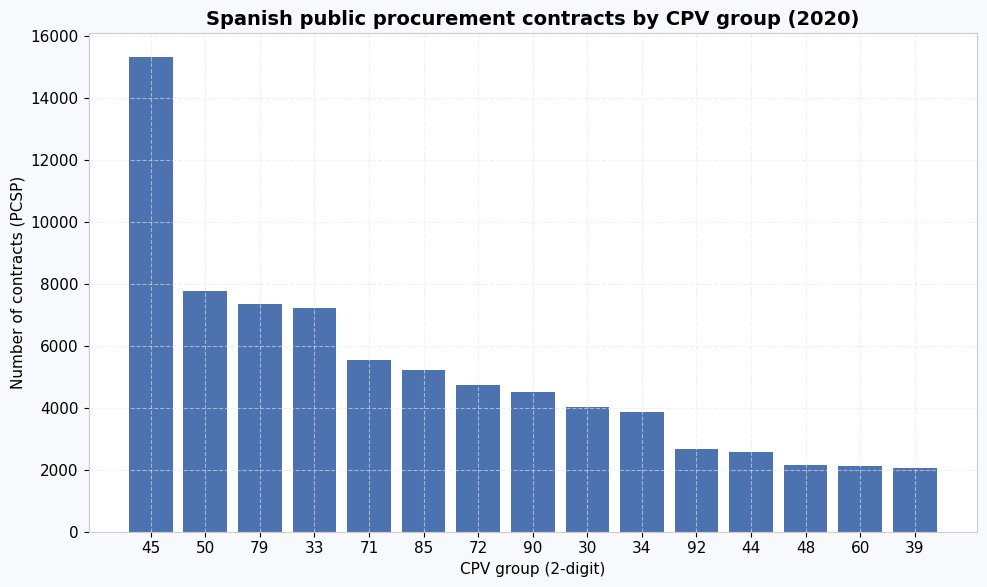

In [15]:
plot_df = comparison.sort_values("pcsp_contracts", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(
    plot_df["cpv_group_2"],
    plot_df["pcsp_contracts"],
    color="#4C72B0"
)

plt.title(
    "Spanish public procurement contracts by CPV group (2020)",
    fontsize=14,
    weight="bold"
)
plt.xlabel("CPV group (2-digit)")
plt.ylabel("Number of contracts (PCSP)")

plt.tight_layout()
plt.savefig("../reports/figures/pcsp_contracts_by_cpv_2020.png", dpi=150)
plt.show()



### EU-level procurement notices (TED) by CPV group – Spain (2020)

This chart presents the number of procurement notices published in Tenders Electronic Daily (TED) for Spain in 2020, grouped by 2-digit CPV codes.

**Results**

The sectoral distribution of Spanish procurement notices published in TED in 2020 differs markedly from the national PCSP pattern. Healthcare and social services (CPV 85) represent the largest share of TED notices, with more than 20,000 publications, making this sector the most visible at EU level.

Other prominent CPV groups include professional services (CPV 33), transport-related services, and utilities-related procurement. In contrast, construction-related procurement (CPV 45), despite its dominance in national data, appears far less frequently in TED. This suggests that a substantial proportion of construction contracts in Spain remain below EU publication thresholds and therefore are not systematically visible at EU level.



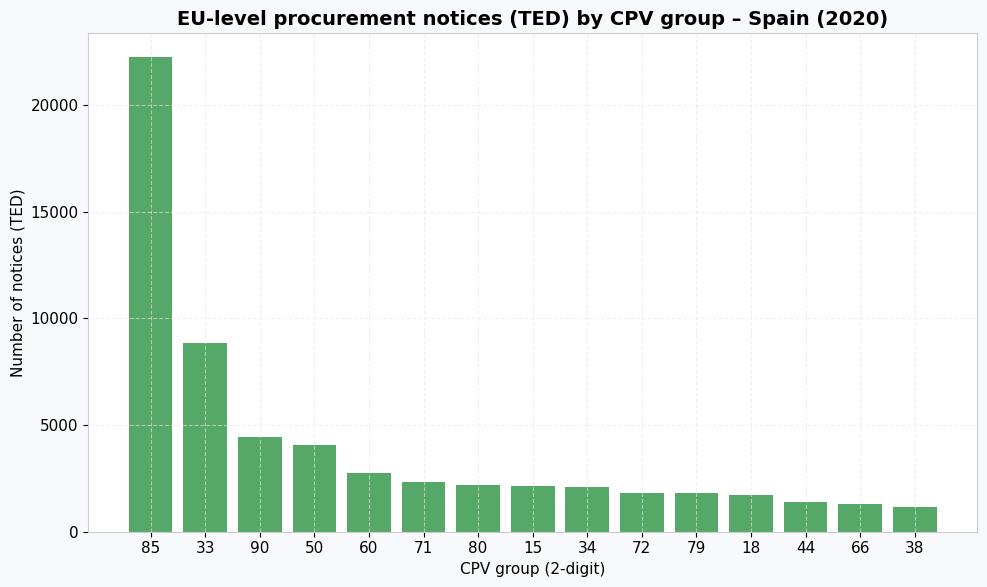

In [16]:
plot_df = comparison.sort_values("ted_notices", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(
    plot_df["cpv_group_2"],
    plot_df["ted_notices"],
    color="#55A868"
)

plt.title(
    "EU-level procurement notices (TED) by CPV group – Spain (2020)",
    fontsize=14,
    weight="bold"
)
plt.xlabel("CPV group (2-digit)")
plt.ylabel("Number of notices (TED)")

plt.tight_layout()
plt.savefig("../reports/figures/ted_notices_by_cpv_2020.png", dpi=150)
plt.show()


### PCSP vs TED procurement intensity by CPV group (Spain, 2020)

This scatter plot compares national-level procurement activity (PCSP contracts) with EU-level publication activity (TED notices) across CPV groups for Spain in 2020.

**Results**

The comparative analysis highlights significant differences in publication intensity across procurement sectors. Construction (CPV 45) exhibits a very high number of national contracts but relatively few TED notices, indicating a predominance of smaller-scale procurement procedures.

Conversely, healthcare and social services (CPV 85) show a high level of visibility in TED relative to the number of national contracts, reflecting higher average contract values and greater relevance for EU-level publication. Professional and technical services (CPV 33 and CPV 71) occupy an intermediate position, with substantial activity observed at both national and EU levels.

Overall, the results demonstrate that sectoral differences in contract size and regulatory thresholds play a decisive role in shaping the visibility of public procurement data at EU level, underlining the importance of combining national and European datasets for policy-oriented analysis.



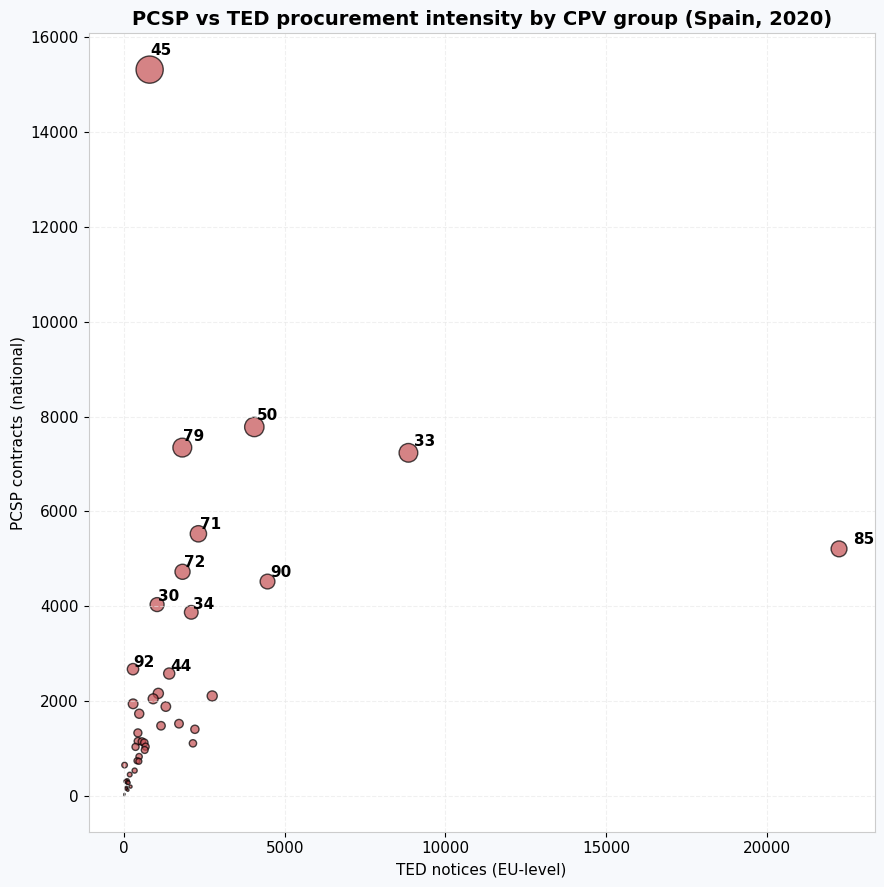

In [17]:
plot_df = comparison.copy()

plt.figure(figsize=(9, 9))
plt.scatter(
    plot_df["ted_notices"],
    plot_df["pcsp_contracts"],
    s=plot_df["pcsp_contracts"] / 40,
    color="#C44E52",
    alpha=0.7,
    edgecolor="black"
)

# Etiquetar solo los CPV más relevantes
top = plot_df.sort_values("pcsp_contracts", ascending=False).head(12)
for _, row in top.iterrows():
    plt.text(
        row["ted_notices"] * 1.02,
        row["pcsp_contracts"] * 1.02,
        row["cpv_group_2"],
        fontsize=11,
        weight="bold"
    )

plt.title(
    "PCSP vs TED procurement intensity by CPV group (Spain, 2020)",
    fontsize=14,
    weight="bold"
)
plt.xlabel("TED notices (EU-level)")
plt.ylabel("PCSP contracts (national)")

plt.tight_layout()
plt.savefig("../reports/figures/pcsp_vs_ted_scatter_2020.png", dpi=150)
plt.show()
